<a href="https://colab.research.google.com/github/adenadit/My-Data-Science-Site/blob/main/Numpy/Basic/7_Sorting_Arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

> contoh penerapan sort


In [4]:
def selection_sort(x):
  for i in range(len(x)):
    swap = i + np.argmin(x[i:])
    (x[i], x[swap]) = (x[swap],x[i])
  return x

In [5]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [6]:
def bogosort(x):
  while np.any(x[:-1] > x[1:]):
    np.random.shuffle(x)
  return x

In [7]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

# **Fast Sorting in NumPy: np.sort and np.argsort**

> penerapan sort tanpa mengubah input awal

In [9]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

> penerapan sort array in place

In [10]:
x.sort()
print(x)

[1 2 3 4 5]


> penerapan argsort untuk mengetahui kondisi urutan element

In [12]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [14]:
x[i]

array([1, 2, 3, 4, 5])

* **Sorting along rows or columns**

In [15]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


> sort pada coloumn X

In [16]:
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

> sort pada row X

In [17]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

# **Partial Sorts: Partitioning**

In [21]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [22]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

# **Example: k-Nearest Neighbors**

In [24]:
X = rand.rand(10, 2)


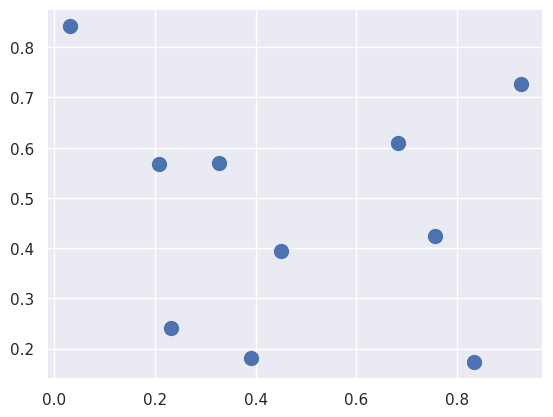

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()     #plot style
plt.scatter(X[:, 0], X[:, 1], s=100);

In [27]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:])**2,axis=-1)

In [28]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [30]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [31]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [32]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 7 5 9 4 1 2 6 8]
 [1 4 8 7 9 2 5 3 0 6]
 [2 4 3 7 1 8 0 9 5 6]
 [3 0 7 9 5 4 2 1 6 8]
 [4 1 2 7 8 3 9 0 5 6]
 [5 9 7 6 0 3 1 4 8 2]
 [6 5 9 7 0 1 3 4 8 2]
 [7 9 3 0 5 4 1 2 8 6]
 [8 1 4 2 7 9 5 3 0 6]
 [9 5 7 0 1 3 6 4 8 2]]


In [36]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

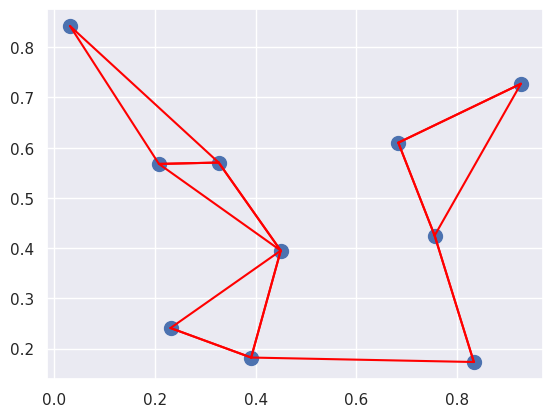

In [37]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
  for j in nearest_partition[i, :K+1]:
# plot a line from X[i] to X[j]
# use some zip magic to make it happen:

    plt.plot(*zip(X[j], X[i]),color='red')